In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hike_data.csv')

In [3]:
df.head()

,Latitude,Longitude,Elevation
0,51.20257,-115.59737,1691.0
1,51.20259,-115.59734,1691.0
2,51.20262,-115.59732,1692.0
3,51.20265,-115.59730,1692.0
4,51.20268,-115.59729,1693.0


In [4]:
df.describe()

,Latitude,Longitude,Elevation
count,5023.000000,5023.000000,5023.000000
mean,51.224317,-115.598374,1959.351185
std,0.008697,0.012297,362.045170
min,51.202570,-115.612320,1566.000000
25%,51.219150,-115.608430,1643.000000
50%,51.226040,-115.602320,1813.000000
75%,51.231445,-115.590180,2264.000000
max,51.236140,-115.569570,2737.000000


In [5]:
max_elevation = df.Elevation.max()
min_elevation = df.Elevation.min()
elevation_change = max_elevation - min_elevation

In [6]:
elevation_change

1171.0

In [7]:
df.isna().sum()

Latitude     0
Longitude    0
Elevation    0
dtype: int64

In [8]:
df.dtypes

Latitude     float64
Longitude    float64
Elevation    float64
dtype: object

In [9]:
time = 304 #minutes
distance = 19.05 #km
num_rows = len(df) - 1 #5022 
distance_per_row = distance/num_rows

In [10]:
df['distance'] = df.index * distance_per_row

In [11]:
df

,Latitude,Longitude,Elevation,distance
0,51.20257,-115.59737,1691.0,0.000000
1,51.20259,-115.59734,1691.0,0.003793
2,51.20262,-115.59732,1692.0,0.007587
3,51.20265,-115.59730,1692.0,0.011380
4,51.20268,-115.59729,1693.0,0.015173
...,...,...,...,...
5018,51.20312,-115.59774,1689.0,19.034827
5019,51.20309,-115.59772,1689.0,19.038620
5020,51.20307,-115.59768,1690.0,19.042413
5021,51.20304,-115.59765,1690.0,19.046207


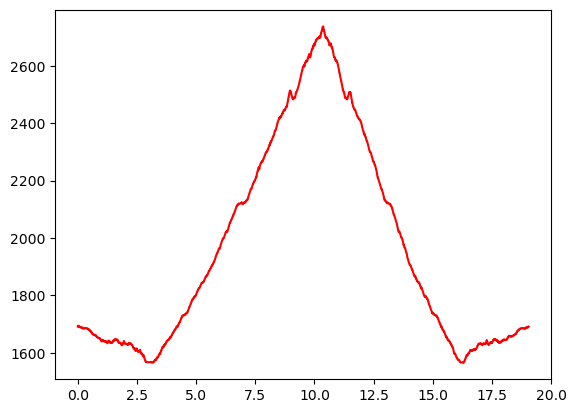

In [12]:
plt.plot(df.distance,df.Elevation, color='red')
plt.show()

In [13]:
speed_df = pd.read_csv('speed_data.csv')

In [14]:
speed_df.head()

,kilometers,avg_speed,elevation_gain
0,1,4.82,37 m
1,2,5.10,58 m
2,3,4.89,18 m
3,4,4.75,103 m
4,5,4.06,157 m


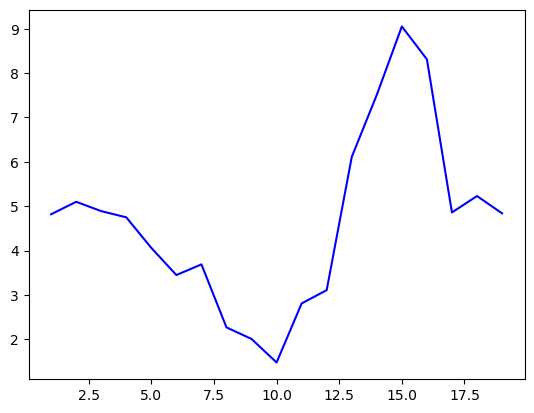

In [15]:
plt.plot(speed_df.kilometers, speed_df.avg_speed, color='blue')
plt.show()

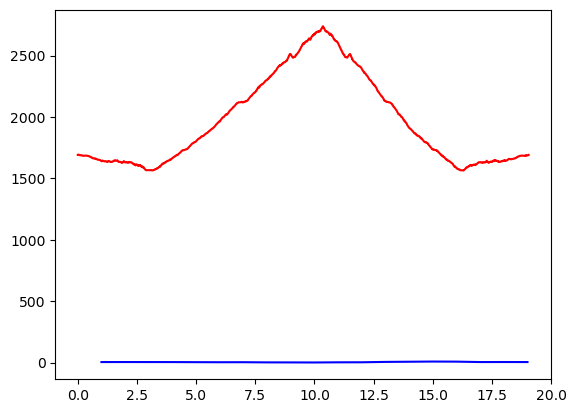

In [16]:
plt.plot(speed_df.kilometers, speed_df.avg_speed, color='blue', label='Speed')
plt.plot(df.distance,df.Elevation, color='red', label='Elevation')
plt.show()

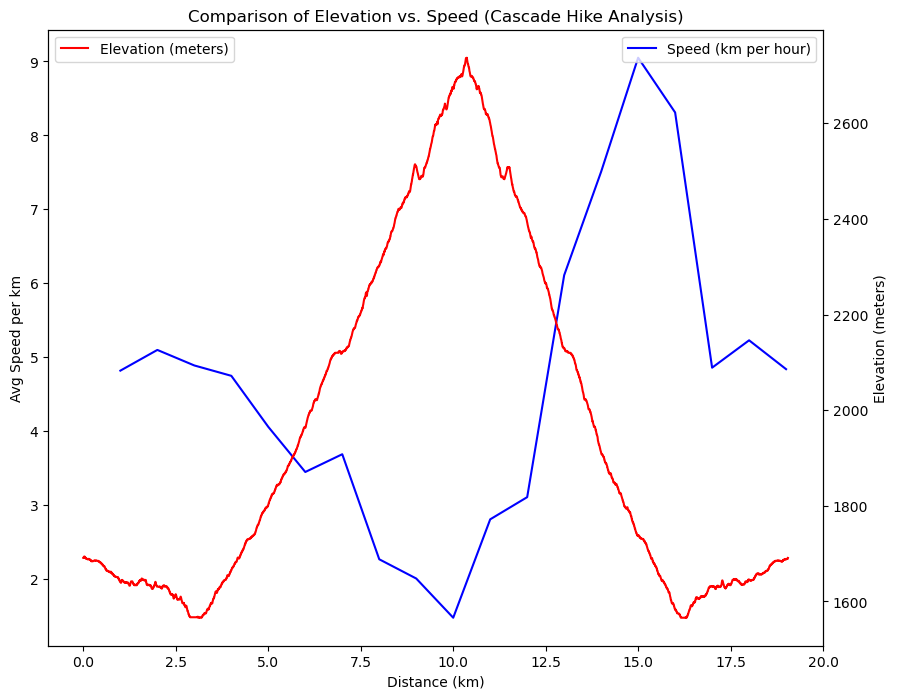

In [17]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(speed_df.kilometers, speed_df.avg_speed, color='blue')
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Avg Speed per km")

ax2 = ax1.twinx()

ax2.plot(df.distance,df.Elevation, color='red')
ax2.set_ylabel("Elevation (meters)")

ax1.legend(['Speed (km per hour)'], loc='upper right')
ax2.legend(['Elevation (meters)'], loc='upper left')

plt.title("Comparison of Elevation vs. Speed (Cascade Hike Analysis)")
plt.savefig('Cascade_analysis.png')
plt.show()
